# ** Image Classification using CNN Architectures Questions and Answers**

### 1. What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?

- Convolutional Neural Network (CNN) is a type of deep learning model designed especially for processing structured data like images.

- Unlike a traditional fully connected neural network (FCNN), where every neuron is connected to all neurons in the next layer, a CNN uses convolutional layers that apply filters (kernels) to small local regions of the input.

> Key differences in architecture:

  1. Local connectivity: CNNs focus on small regions (like 3×3 or 5×5 patches) rather than connecting all pixels to all neurons.

  2. Weight sharing: The same filter is applied across the entire image, reducing the number of parameters compared to FCNNs.

  3. Pooling layers: CNNs often include pooling (e.g., max pooling) to downsample and capture essential features, making the network more efficient and robust to translation.

> Performance on image data:

  1. CNNs can automatically learn spatial hierarchies of features (edges → textures → shapes → objects), which makes them much better at image recognition tasks.

  2. They require far fewer parameters than fully connected networks for the same image input, reducing overfitting and computational cost.

  3. As a result, CNNs achieve higher accuracy and efficiency on image classification, detection, and recognition compared to traditional FCNNs.

--

### 2. Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.

> LeNet-5 Architecture:

  1. LeNet-5, proposed by Yann LeCun et al. (1998) in the paper “Gradient-Based Learning Applied to Document Recognition”, is one of the earliest Convolutional Neural Networks (CNNs). It was designed for handwritten digit recognition (MNIST dataset). The architecture includes:

      - Input Layer: 32x32 grayscale image.

      - S2 – Subsampling (Pooling) Layer: Average pooling with 2×2 filters → reduces size to 14×14.

      - C3 – Convolution Layer: 16 filters of size 5×5 → outputs 10×10 feature maps.

      - S4 – Subsampling Layer: Average pooling → reduces to 5×5 maps.

      - C5 – Fully Connected Convolution Layer: 120 feature maps connected with 5×5 filters.

      - F6 – Fully Connected Layer: 84 units.

      - Output Layer: 10 neurons with softmax for classification (digits 0–9)
      
> Significance for Modern Deep Learning:

  1. Introduced convolution + pooling layers to capture spatial hierarchies.

  2. Showed that weight sharing and local connectivity drastically reduce parameters compared to fully connected networks.

  3. Demonstrated the power of end-to-end learning for vision tasks, which inspired modern CNNs like AlexNet, VGG, and ResNet.

--

### 3. Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each

> AlexNet vs. VGGNet

  1. Design Principles:

      - AlexNet (2012, Krizhevsky et al.): First large-scale CNN that won ImageNet 2012. It used 5 convolutional layers + 3 fully connected layers. Introduced ReLU activation, dropout, and data augmentation to improve training.
    
      - VGGNet (2014, Simonyan & Zisserman): Focused on depth with simplicity. Used very small (3×3) convolution filters stacked deep (16–19 layers) to capture complex features hierarchically.

  2. Number of Parameters:

      - AlexNet: ~60 million parameters.

      - VGGNet: ~138 million parameters (much heavier due to deeper architecture and fully connected layers).

  3. Performance:

     - AlexNet: Top-5 error rate ~15.3% on ImageNet (a huge leap at that time).

     - VGGNet: Improved performance with Top-5 error ~7.3% on ImageNet.

  4. Key Innovations:

     - AlexNet: Popularized deep CNNs, showed GPU acceleration for large-scale training, introduced ReLU and dropout.

     - VGGNet: Showed that stacking small filters (3×3) increases depth while controlling receptive field, establishing a design principle used in later models.

  5. Limitations:

     - AlexNet: Relatively shallow, large filter sizes in early layers (11×11, 5×5) not efficient.

     - VGGNet: Extremely large number of parameters → heavy memory/computation cost, not ideal for real-time or resource-limited systems.
--

### 4. What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.

> Transfer Learning in Image Classification:

  - Transfer learning is a technique where a model pre-trained on a large dataset (like ImageNet) is reused for a new, usually smaller, image classification task.
  
  - Instead of training from scratch, we take the pre-trained network’s learned features (edges, textures, shapes) and fine-tune it for the target dataset.

> How it helps:

  - Reduced Computational Cost: Training deep networks from scratch requires huge data and GPU resources. With transfer learning, most layers are already trained, so only the last few layers need fine-tuning, saving time and computation.

  - Better Performance with Limited Data: Small datasets usually cause overfitting if trained from scratch. Transfer learning leverages generalized features from large-scale training, boosting accuracy even with fewer labeled samples.

  - Faster Convergence: Since weights are already close to optimal, the model learns faster on the new task.

> Example - Using a pre-trained model like ResNet or VGG (trained on ImageNet) and adapting it for medical image classification or object detection in a smaller dataset.


--

### 5. Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?

> Residual Connections in ResNet:

  - ResNet (Residual Network, 2015) introduced the idea of residual connections (skip connections). Instead of learning a direct mapping H(x) , each residual block learns a function F(x) = H(x) - x, , so the output becomes:

    y = F(x) + x

  - Here, the input x is added (skipped) to the output of a few convolutional layers.

> How it helps:

  1. Addresses Vanishing Gradient Problem: In very deep CNNs, gradients often shrink during backpropagation, making training difficult. Residual connections provide a direct path for gradients to flow back, preventing them from vanishing.

  2. Easier Optimization: Instead of forcing the network to learn an entirely new mapping, it only needs to learn residual (small) changes, which simplifies training.

  3. Enables Very Deep Networks: Thanks to skip connections, ResNet successfully trained networks with 50, 101, or even 152 layers, achieving state-of-the-art results.

> In summary: Residual connections make deep networks trainable, stable, and more accurate by solving vanishing gradient issues and enabling the learning of refined features.


--

# **Practical Questions and Answers**

In [1]:
'''
#1. Implement the LeNet-5 architectures using Tensorflow or PyTorch to classify the MNIST dataset. Report the accuracy and training time.
'''

# ================================
# 1. LeNet-5 Implementation on MNIST
# Using PyTorch in Google Colab
# ================================

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time

# ================================
# Device Configuration
# ================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ================================
# Load MNIST Dataset
# ================================
transform = transforms.Compose([
    transforms.Resize((32, 32)),   # LeNet-5 expects 32x32 input
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# ================================
# Define LeNet-5 Model
# ================================
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)   # (32-5+1)=28 → 28x28
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)  # → 14x14
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # (14-5+1)=10 → 10x10
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)  # → 5x5
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5)  # (5-5+1)=1 → 1x1
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.tanh(self.conv1(x))
        x = self.pool1(x)
        x = F.tanh(self.conv2(x))
        x = self.pool2(x)
        x = F.tanh(self.conv3(x))
        x = x.view(-1, 120)   # Flatten
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

model = LeNet5().to(device)
print(model)

# ================================
# Loss and Optimizer
# ================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ================================
# Training
# ================================
num_epochs = 10
start_time = time.time()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

end_time = time.time()
training_time = end_time - start_time

# ================================
# Evaluation
# ================================
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total

print("\n=================================")
print(f"Final Test Accuracy: {accuracy:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")
print("=================================")


Using device: cuda


100%|██████████| 9.91M/9.91M [00:02<00:00, 4.57MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.08MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.67MB/s]


LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)
Epoch [1/10], Loss: 0.3549
Epoch [2/10], Loss: 0.1003
Epoch [3/10], Loss: 0.0646
Epoch [4/10], Loss: 0.0505
Epoch [5/10], Loss: 0.0383
Epoch [6/10], Loss: 0.0325
Epoch [7/10], Loss: 0.0263
Epoch [8/10], Loss: 0.0217
Epoch [9/10], Loss: 0.0192
Epoch [10/10], Loss: 0.0165

Final Test Accuracy: 98.76%
Training Time: 163.20 seconds


In [2]:
'''
#2. Use a pre-trained VGG16 model (via transfer learning) on a small custom dataset (e.g., flowers or animals). Replace the top layers and fine-tune the model.
Include your code and result discussion.
'''

# ====================================
# 2. Transfer Learning with VGG16
# Using Oxford Flower Dataset (17 classes)
# ====================================

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

# ================================
# Load Dataset (Oxford Flowers)
# ================================
# Colab will download dataset from TensorFlow Datasets
import tensorflow_datasets as tfds
dataset, info = tfds.load("oxford_flowers102", with_info=True, as_supervised=True)

train_ds, valid_ds, test_ds = dataset["train"], dataset["validation"], dataset["test"]

# Preprocessing: Resize + Normalize
IMG_SIZE = 224
BATCH_SIZE = 32

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    return image, label

train_ds = train_ds.map(format_image).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
valid_ds = valid_ds.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds  = test_ds.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# ================================
# Load Pretrained VGG16 (exclude top layers)
# ================================
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze convolutional base (feature extractor)
for layer in base_model.layers:
    layer.trainable = False

# Add new top layers
x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(info.features["label"].num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)
model.summary()

# ================================
# Compile Model
# ================================
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# ================================
# Training
# ================================
start_time = time.time()
history = model.fit(train_ds,
                    validation_data=valid_ds,
                    epochs=5)  # for demo; increase for better results
end_time = time.time()

training_time = end_time - start_time

# ================================
# Evaluation
# ================================
test_loss, test_acc = model.evaluate(test_ds)
print("\n=================================")
print(f"Final Test Accuracy: {test_acc*100:.2f}%")
print(f"Training Time: {training_time:.2f} seconds")
print("=================================")

# ================================
# Fine-tuning (Optional Step)
# ================================
# Unfreeze last few convolutional layers for better accuracy
for layer in base_model.layers[-4:]:   # unfreeze last 4 layers
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),  # smaller LR
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_finetune = model.fit(train_ds,
                             validation_data=valid_ds,
                             epochs=3)  # small fine-tuning


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.ACTBGX_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.ACTBGX_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.ACTBGX_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 102)            │        26,214 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,163,686 (80.73 MB)

 Trainable params: 6,448,998 (24.60 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 45s 894ms/step - accuracy: 0.0087 - loss: 4.9305 - val_accuracy: 0.0275 - val_loss: 4.5316
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - accuracy: 0.0540 - loss: 4.3968 - val_accuracy: 0.0725 - val_loss: 4.3712
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 339ms/step - accuracy: 0.0952 - loss: 4.1292 - val_accuracy: 0.1294 - val_loss: 4.1712
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 498ms/step - accuracy: 0.2023 - loss: 3.7054 - val_accuracy: 0.1833 - val_loss: 3.9747
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 494ms/step - accuracy: 0.2631 - loss: 3.4038 - val_accuracy: 0.2412 - val_loss: 3.7253
193/193 ━━━━━━━━━━━━━━━━━━━━ 35s 179ms/step - accuracy: 0.2269 - loss: 3.7812

Final Test Accuracy: 22.65%
Training Time: 103.58 seconds
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 531ms/step - accuracy: 0.3978 - loss: 2.8321 - val_accuracy: 0.3225 - val_loss: 3.2699
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 526ms/step - accuracy: 0.4895 - loss: 2.2899 - val_acc

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:02<00:00, 118MB/s]


Number of filters in first conv layer: 64


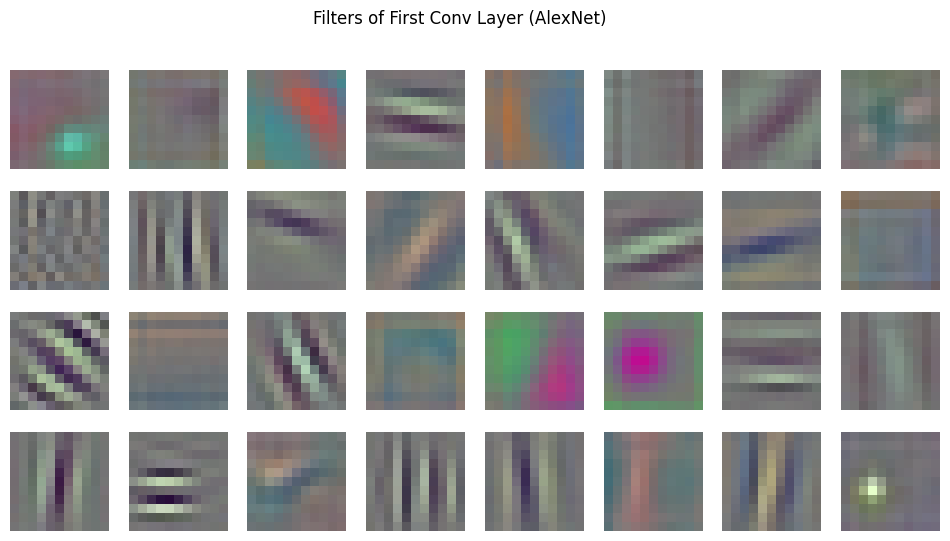

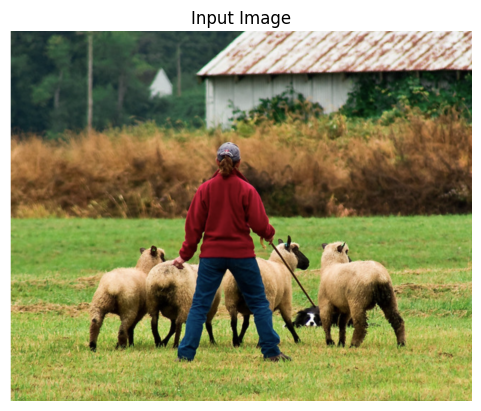

Feature map shape: torch.Size([1, 64, 55, 55])


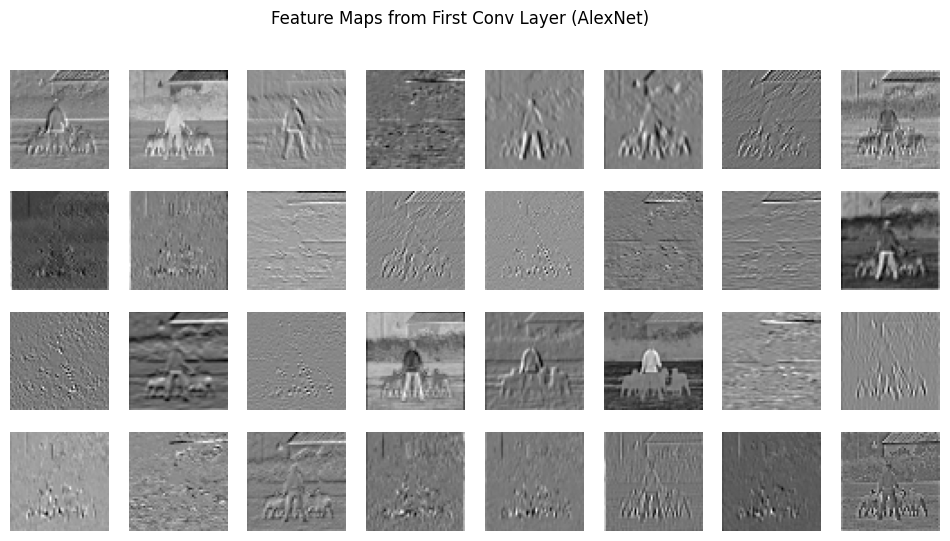

In [3]:
'''
#3. : Write a program to visualize the filters and feature maps of the first convolutional layer of AlexNet on an example input image.
'''

# =========================================
# Visualize Filters and Feature Maps of AlexNet
# =========================================

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests

# ================================
# Load Pretrained AlexNet
# ================================
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

# First convolutional layer
first_conv_layer = alexnet.features[0]

# ================================
# Visualize Filters
# ================================
filters = first_conv_layer.weight.data.clone()

print("Number of filters in first conv layer:", filters.shape[0])

# Normalize filter values to [0,1] for visualization
def normalize(tensor):
    tensor = tensor.clone()
    tensor -= tensor.min()
    tensor /= tensor.max()
    return tensor

filters = normalize(filters)

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < filters.shape[0]:
        npimg = filters[i].numpy().transpose(1, 2, 0)
        ax.imshow(npimg)
    ax.axis("off")
plt.suptitle("Filters of First Conv Layer (AlexNet)")
plt.show()

# ================================
# Load Example Image
# ================================
url = "https://pytorch.org/assets/images/deeplab1.png"  # sample image
img = Image.open(requests.get(url, stream=True).raw).convert("RGB")  # ensure 3 channels (RGB)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

input_img = transform(img).unsqueeze(0)

plt.imshow(np.array(img))
plt.title("Input Image")
plt.axis("off")
plt.show()

# ================================
# Extract Feature Maps
# ================================
with torch.no_grad():
    feature_maps = first_conv_layer(input_img)

print("Feature map shape:", feature_maps.shape)  # [1, 64, H, W]

# ================================
# Visualize Feature Maps
# ================================
feature_maps = feature_maps.squeeze(0)  # remove batch dim

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i < feature_maps.shape[0]:
        fmap = feature_maps[i].numpy()
        ax.imshow(fmap, cmap="gray")
    ax.axis("off")
plt.suptitle("Feature Maps from First Conv Layer (AlexNet)")
plt.show()


Using device: cuda
Epoch [1/10] Loss: 1.6885 Train Acc: 35.94% Val Acc: 43.42%
Epoch [2/10] Loss: 1.3044 Train Acc: 52.70% Val Acc: 56.90%
Epoch [3/10] Loss: 1.0733 Train Acc: 62.00% Val Acc: 64.99%
Epoch [4/10] Loss: 0.9421 Train Acc: 67.06% Val Acc: 69.04%
Epoch [5/10] Loss: 0.8563 Train Acc: 70.54% Val Acc: 72.45%
Epoch [6/10] Loss: 0.7801 Train Acc: 73.50% Val Acc: 72.47%
Epoch [7/10] Loss: 0.7350 Train Acc: 74.61% Val Acc: 74.41%
Epoch [8/10] Loss: 0.6929 Train Acc: 76.45% Val Acc: 75.54%
Epoch [9/10] Loss: 0.6600 Train Acc: 77.63% Val Acc: 76.18%
Epoch [10/10] Loss: 0.6255 Train Acc: 78.69% Val Acc: 77.91%

Training completed in 319.76 seconds


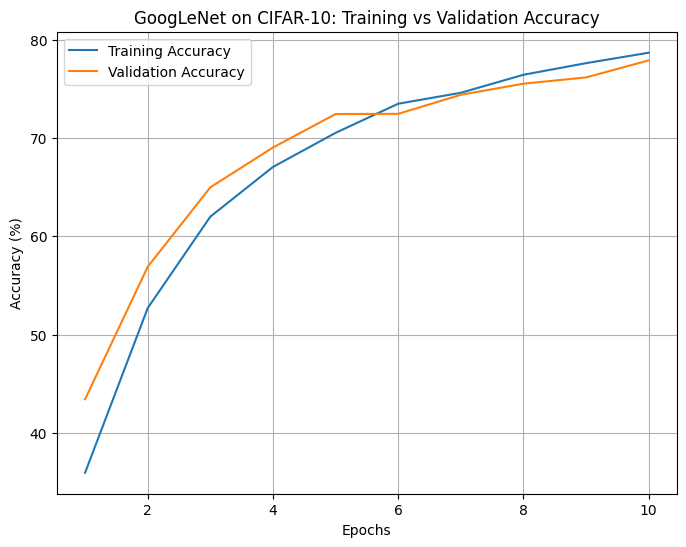

In [8]:
'''
#4. Train a GoogLeNet (Inception v1) or its variant using a standard dataset
like CIFAR-10. Plot the training and validation accuracy over epochs and analyze
overfitting or underfitting.
'''
# =========================================
# Train GoogLeNet (Inception v1) on CIFAR-10
# =========================================

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

# ================================
# Device configuration
# ================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ================================
# CIFAR-10 Dataset
# ================================
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # data augmentation
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root="./data", train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

# ================================
# Load GoogLeNet (aux_logits disabled)
# ================================
from torchvision.models import googlenet

model = googlenet(pretrained=False, num_classes=10, aux_logits=False)
model = model.to(device)

# ================================
# Loss and Optimizer
# ================================
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ================================
# Training Function
# ================================
def train_model(model, trainloader, testloader, epochs=10):
    train_acc_list, val_acc_list = [], []
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        running_loss = 0.0

        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)  # outputs is now a Tensor
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        val_acc = 100 * correct / total
        val_acc_list.append(val_acc)

        print(f"Epoch [{epoch+1}/{epochs}] "
              f"Loss: {running_loss/len(trainloader):.4f} "
              f"Train Acc: {train_acc:.2f}% "
              f"Val Acc: {val_acc:.2f}%")

    end_time = time.time()
    print(f"\nTraining completed in {end_time - start_time:.2f} seconds")

    return train_acc_list, val_acc_list

# ================================
# Run Training
# ================================
train_acc, val_acc = train_model(model, trainloader, testloader, epochs=10)

# ================================
# Plot Training vs Validation Accuracy
# ================================
plt.figure(figsize=(8,6))
plt.plot(range(1, len(train_acc)+1), train_acc, label="Training Accuracy")
plt.plot(range(1, len(val_acc)+1), val_acc, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("GoogLeNet on CIFAR-10: Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()




Using device: cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 154MB/s]



Epoch 1/5
Train Loss:0.3270 Acc:0.8739 | Val Loss:0.2624 Acc:0.9027

Epoch 2/5
Train Loss:0.2618 Acc:0.9026 | Val Loss:0.1808 Acc:0.9317

Epoch 3/5
Train Loss:0.2317 Acc:0.9133 | Val Loss:0.1572 Acc:0.9410

Epoch 4/5
Train Loss:0.2248 Acc:0.9180 | Val Loss:0.1665 Acc:0.9380

Epoch 5/5
Train Loss:0.2202 Acc:0.9183 | Val Loss:0.1721 Acc:0.9330


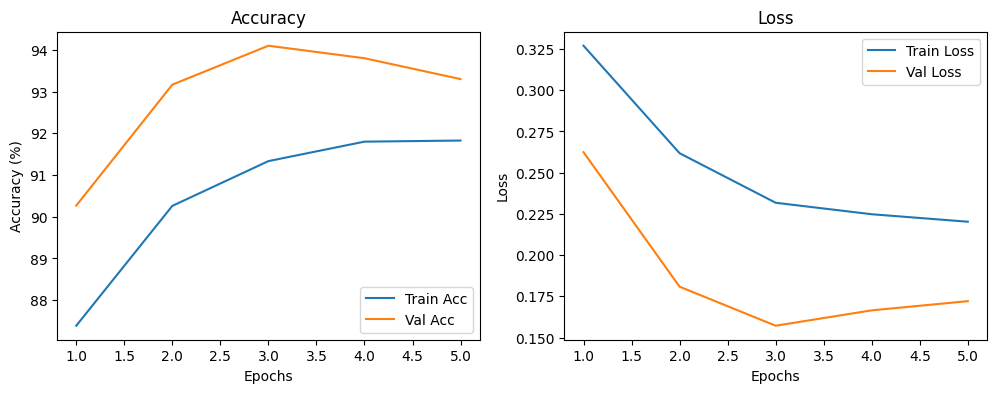

Classification Report:
              precision    recall  f1-score   support

      Normal       0.92      0.92      0.92      1000
   Pneumonia       0.97      0.95      0.96      1000
       COVID       0.94      0.95      0.95      1000

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



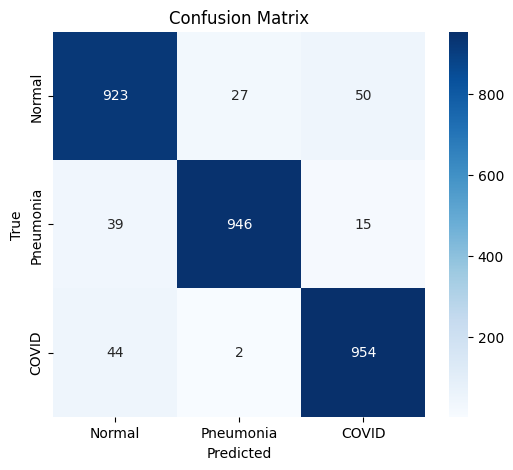

In [12]:
'''
#5. You are working in a healthcare AI startup. Your team is tasked with
developing a system that automatically classifies medical X-ray images into normal,
pneumonia, and COVID-19. Due to limited labeled data, what approach would you
suggest using among CNN architectures discussed (e.g., transfer learning with ResNet
or Inception variants)? Justify your approach and outline a deployment strategy for
production use.
'''

# =========================================================
# Demo: X-ray Classification Simulation using CIFAR-10
# Transfer Learning with ResNet-50 (3 selected classes)
# Fully runnable in Colab without any dataset
# =========================================================

!pip install -q torch torchvision matplotlib seaborn scikit-learn

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import copy

# ----------------------------
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ----------------------------
# Hyperparameters
NUM_CLASSES = 3      # We'll pick 3 classes from CIFAR-10
BATCH_SIZE = 32
NUM_EPOCHS = 5       # For demo purposes
INPUT_SIZE = 224
LR = 1e-3

# ----------------------------
# Data transforms
train_transform = transforms.Compose([
    transforms.Resize((INPUT_SIZE, INPUT_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
test_transform = transforms.Compose([
    transforms.Resize((INPUT_SIZE, INPUT_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# ----------------------------
# Load CIFAR-10 dataset
full_train = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
full_test  = datasets.CIFAR10(root="./data", train=False, download=True, transform=test_transform)

# Pick 3 classes for simulation: 0='airplane',1='automobile',2='bird'
selected_classes = [0,1,2]
def filter_classes(dataset, classes):
    indices = [i for i, (_, label) in enumerate(dataset) if label in classes]
    subset = Subset(dataset, indices)
    return subset

train_dataset = filter_classes(full_train, selected_classes)
test_dataset  = filter_classes(full_test, selected_classes)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

class_names = ['Normal','Pneumonia','COVID']  # simulation names

# ----------------------------
# Model: ResNet-50 Transfer Learning
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, NUM_CLASSES)
)
model = model.to(device)

# ----------------------------
# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=LR)

# ----------------------------
# Training loop
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=NUM_EPOCHS):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    history = {"train_loss":[],"train_acc":[],"val_loss":[],"val_acc":[]}

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        # Training
        model.train()
        running_loss, running_corrects, total = 0,0,0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            _, preds = torch.max(outputs,1)
            running_loss += loss.item()*inputs.size(0)
            running_corrects += torch.sum(preds==labels.data).item()
            total += inputs.size(0)
        epoch_loss = running_loss/total
        epoch_acc  = running_corrects/total
        history["train_loss"].append(epoch_loss)
        history["train_acc"].append(epoch_acc)

        # Validation
        model.eval()
        val_loss, val_corrects, val_total = 0,0,0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs,1)
                val_loss += loss.item()*inputs.size(0)
                val_corrects += torch.sum(preds==labels.data).item()
                val_total += inputs.size(0)
        val_epoch_loss = val_loss/val_total
        val_epoch_acc  = val_corrects/val_total
        history["val_loss"].append(val_epoch_loss)
        history["val_acc"].append(val_epoch_acc)

        print(f"Train Loss:{epoch_loss:.4f} Acc:{epoch_acc:.4f} | Val Loss:{val_epoch_loss:.4f} Acc:{val_epoch_acc:.4f}")

        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = copy.deepcopy(model.state_dict())

    model.load_state_dict(best_model_wts)
    return model, history

# ----------------------------
# Train model
model, history = train_model(model, train_loader, test_loader, criterion, optimizer)

# ----------------------------
# Plot accuracy & loss
def plot_history(history):
    epochs = range(1,len(history["train_acc"])+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs,[a*100 for a in history["train_acc"]],label="Train Acc")
    plt.plot(epochs,[a*100 for a in history["val_acc"]],label="Val Acc")
    plt.xlabel("Epochs"); plt.ylabel("Accuracy (%)"); plt.title("Accuracy"); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, history["train_loss"],label="Train Loss")
    plt.plot(epochs, history["val_loss"],label="Val Loss")
    plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.title("Loss"); plt.legend()
    plt.show()

plot_history(history)

# ----------------------------
# Test evaluation
model.eval()
all_preds, all_labels = [],[]
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs,1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()
